# 순환 신경망

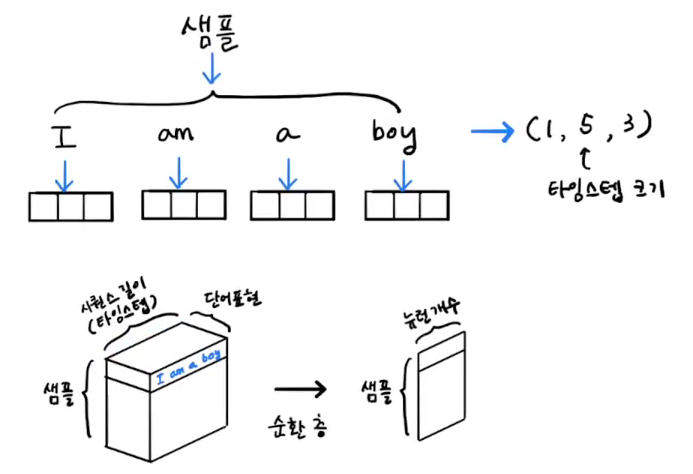

- 문장하나 있으면 시퀀스 1개, 단어 4+1개, 단어하나당 크기3 -> (1, 5, 3)
  - 4가 아닌 4+1 5인 이유는 문장 첫 시작 부분때문에 자동 +1
- 문장들이 모여 샘플들이 되는건데.. 문장들 크기가 다 다르면 테트리스처럼 어긋난다
  - 문장크기가 서로 비슷해야함
  - 그래서 maxlen, 패딩 쓰는 이유임. 

## IMDB 리뷰 데이터셋 **(RNN에서의 대표적 전처리)**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500) # 500 : 분석대상을 자주 쓰이는 단어 500개로 추린다

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [ ]:
print(len(train_input[0]))
# 첫번째 문장의 길이는 218이다 (218개의 단어로 되어있음)

218


In [ ]:
print(train_input[0])
# 첫번째 문장을 실제로 print한건데 각 단어들이 숫자로 매칭되어 있음

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


- **218**은 **문장의 길이(단어의 개수)**
- 안에 숫자들은 문장 내부 **단어의 길이**!!

- '1' : 문장의 시작 의미
- '2' : 500개로 설정한 단어목록 중에 없는 단어 의미 

In [ ]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


- 타겟값이 0(부정), 1(긍정)으로 이루어짐

In [ ]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [ ]:
import numpy as np
lengths = np.array([len(x) for x in train_input])

In [ ]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


- 평균값과 중앙값에서 차이가 꽤 있음
  - 데이터 편향 의미
  - 시각화로 좀 더 확인해보자 

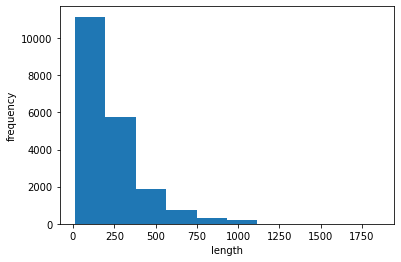

In [ ]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

- 실제로 문장하나의 길이(단어의 개수)는 100 안쪽이고, 아웃라이어가 있음을 확인 가능 

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)

- from tensorflow.keras.preprocessing.sequence import pad_sequences
- "maxlen" : 최대 문장길이(단어의개수)가 100개까지만 취급하고, 100보다 작은건 0으로 채워 넣는다
  - 즉 문장에서 파이썬은 문장시작을 1, 패딩으로 채워넣은것을 0으로 취급함.

In [ ]:
print(train_seq.shape)

(20000, 100)


In [ ]:
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


- 이 샘플의 앞뒤에 패딩값 0이 없는것으로 보아 단어의길이가 100보다는 길었을 것
- 그렇다면 앞부분이 잘렸을까 뒷부분이 잘렸을까

In [ ]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


- 원본샘플의 끝부분 10개임.
- 위에서의 뒷부분 10개와 일치하므로 앞부분이 잘렸다는것.
- 언어권마다 중요한 내용이 앞에 있다 뒤에 있다 인식하는게 달라져서 사용자가 판단해야하는 부분. (매개변수 조정가능 : 디폴트 pre -> post)

In [ ]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [ ]:
val_seq = pad_sequences(val_input, maxlen=100) # 검증데이터도 마찬가지로 패딩조치 

## 순환 신경망 만들기

In [ ]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500))) # 8은 그냥 임의? 100은 앞에 그 이유, 500은 맨 처음 지정한 num_words
model.add(keras.layers.Dense(1, activation='sigmoid')) # 이진분류라서 1, 시그모이드를 통해 1개만 내보낸다.

In [ ]:
train_oh = keras.utils.to_categorical(train_seq)

- to_categorical : 숫자 사이에 아무런 의미가 없으니까 원핫인코딩 조치해준다.

In [ ]:
print(train_oh.shape)

(20000, 100, 500)


In [ ]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [ ]:
print(np.sum(train_oh[0][0]))

1.0


In [ ]:
val_oh = keras.utils.to_categorical(val_seq)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


- 4,072 
  - 500 * 8(순환층의 뉴런 수) + 8(은닉 상태 크기) * 8(뉴런 개수) + 8(뉴런마다 절편) = 4,072

## 순환 신경망 훈련하기

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4) # 이거 0.0001 이란 의미임
# optimizer의 디폴트값이 RMSprop인데 이거 값이 0.001이라서 위에서 새로 만들어줌
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, batch_size=64,validation_data=(val_oh, val_target),callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 29s 83ms/step - loss: 0.7012 - accuracy: 0.5034 - val_loss: 0.6998 - val_accuracy: 0.4998
Epoch 2/100
313/313 [==============================] - 25s 79ms/step - loss: 0.6968 - accuracy: 0.5124 - val_loss: 0.6972 - val_accuracy: 0.5018
Epoch 3/100
313/313 [==============================] - 25s 78ms/step - loss: 0.6940 - accuracy: 0.5206 - val_loss: 0.6953 - val_accuracy: 0.5060
Epoch 4/100
313/313 [==============================] - 25s 79ms/step - loss: 0.6917 - accuracy: 0.5272 - val_loss: 0.6939 - val_accuracy: 0.5148
Epoch 5/100
313/313 [==============================] - 25s 79ms/step - loss: 0.6897 - accuracy: 0.5336 - val_loss: 0.6926 - val_accuracy: 0.5198
Epoch 6/100
313/313 [==============================] - 24s 78ms/step - loss: 0.6879 - accuracy: 0.5436 - val_loss: 0.6916 - val_accuracy: 0.5232
Epoch 7/100
313/313 [==============================] - 24s 78ms/step - loss: 0.6861 - accuracy: 0.5508 - val_loss: 0.6906 - val_ac

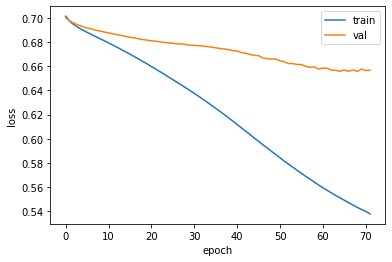

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 단어 임베딩을 사용하기
- 원핫인코딩은 서로간의 의미를 완전 없애버림
- 단어들 사이에서 유사의미 가진애들끼리는 그 경향성을 반영해주는 것이 '임베딩'
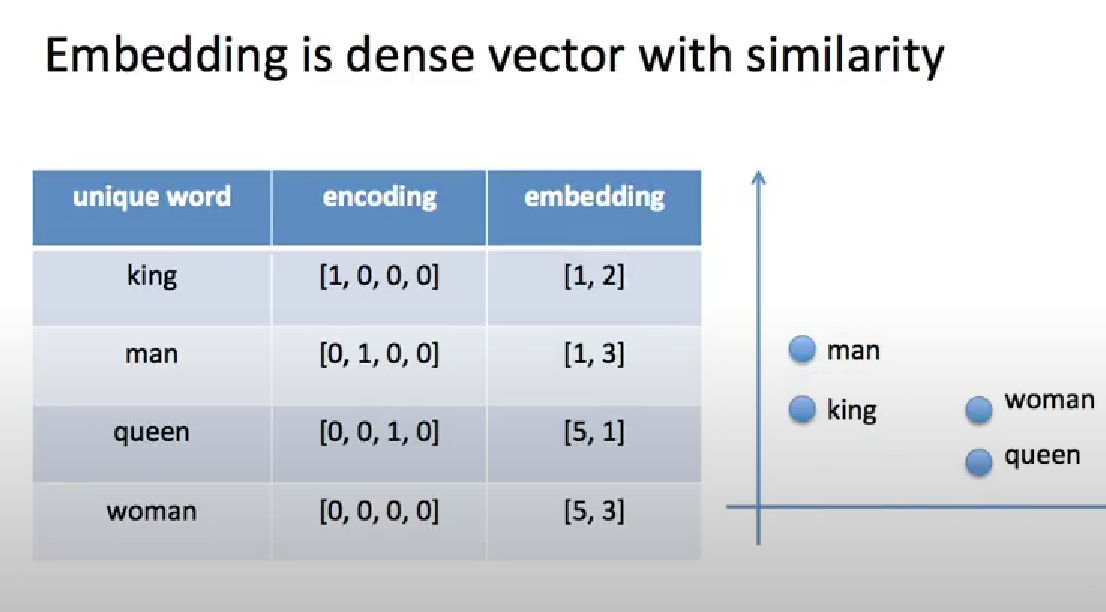

In [ ]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_length=100)) # 단어사전크기, 하이퍼파라미터, 아까 선택한 100
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


- 8000 = 500 * 16
- 200 = 16 * 8 + 8 * 8 + 8 (절편)

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,validation_data=(val_seq, val_target),callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 31s 95ms/step - loss: 0.6926 - accuracy: 0.5145 - val_loss: 0.6916 - val_accuracy: 0.5162
Epoch 2/100
313/313 [==============================] - 30s 94ms/step - loss: 0.6890 - accuracy: 0.5357 - val_loss: 0.6897 - val_accuracy: 0.5306
Epoch 3/100
313/313 [==============================] - 30s 96ms/step - loss: 0.6855 - accuracy: 0.5521 - val_loss: 0.6885 - val_accuracy: 0.5372
Epoch 4/100
313/313 [==============================] - 31s 100ms/step - loss: 0.6817 - accuracy: 0.5648 - val_loss: 0.6875 - val_accuracy: 0.5328
Epoch 5/100
313/313 [==============================] - 31s 98ms/step - loss: 0.6779 - accuracy: 0.5782 - val_loss: 0.6867 - val_accuracy: 0.5362
Epoch 6/100
313/313 [==============================] - 32s 103ms/step - loss: 0.6735 - accuracy: 0.5889 - val_loss: 0.6846 - val_accuracy: 0.5448
Epoch 7/100
313/313 [==============================] - 31s 99ms/step - loss: 0.6644 - accuracy: 0.6182 - val_loss: 0.6683 - val_

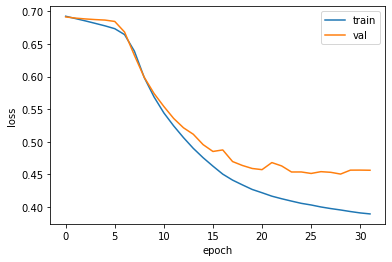

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# LSTM과 GRU 셀 (여기서부터는 필요할때 다시 공부) 
- LSTM
  - 문장이 길어지면서 앞에걸 기억을 못하는경우 발생. 이런경우를 위해 이용
  - 과거의 정보를 새로운 데이터가 들어오면서 어느정도로 기억하고 어느정도로 잊어야하는지를 판단하는것임!
  - 내부 작은 셀 4개 있는듯 

In [ ]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [ ]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
###############################
model.add(keras.layers.LSTM(8)) ### 여기하나만 바뀜 ###
###############################
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


- 800 이유는 앞에서 구한 200에다가 내부 셀 4개라서 200 * 4

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64,validation_data=(val_seq, val_target),callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 7s 10ms/step - loss: 0.6925 - accuracy: 0.5358 - val_loss: 0.6913 - val_accuracy: 0.6070
Epoch 2/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6893 - accuracy: 0.6305 - val_loss: 0.6857 - val_accuracy: 0.6544
Epoch 3/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6726 - accuracy: 0.6648 - val_loss: 0.6432 - val_accuracy: 0.6918
Epoch 4/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6118 - accuracy: 0.7149 - val_loss: 0.5920 - val_accuracy: 0.7280
Epoch 5/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5816 - accuracy: 0.7346 - val_loss: 0.5733 - val_accuracy: 0.7360
Epoch 6/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5614 - accuracy: 0.7509 - val_loss: 0.5552 - val_accuracy: 0.7538
Epoch 7/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5434 - accuracy: 0.7599 - val_loss: 0.5404 - val_accuracy: 0.755

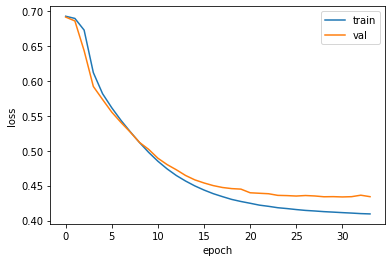

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

과대적합 발생

## 순환 층에 드롭아웃 적용하기

In [ ]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,validation_data=(val_seq, val_target),callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 5s 10ms/step - loss: 0.6923 - accuracy: 0.5390 - val_loss: 0.6910 - val_accuracy: 0.5880
Epoch 2/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6897 - accuracy: 0.5956 - val_loss: 0.6872 - val_accuracy: 0.6352
Epoch 3/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6821 - accuracy: 0.6399 - val_loss: 0.6734 - val_accuracy: 0.6738
Epoch 4/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6408 - accuracy: 0.6923 - val_loss: 0.6045 - val_accuracy: 0.6976
Epoch 5/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5835 - accuracy: 0.7103 - val_loss: 0.5704 - val_accuracy: 0.7282
Epoch 6/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5569 - accuracy: 0.7351 - val_loss: 0.5464 - val_accuracy: 0.7476
Epoch 7/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5378 - accuracy: 0.7484 - val_loss: 0.5284 - val_accuracy: 0.763

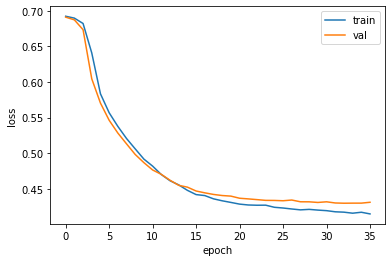

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 2개의 층을 연결하기

In [ ]:
model3 = keras.Sequential()

model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,validation_data=(val_seq, val_target),callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 8s 15ms/step - loss: 0.6930 - accuracy: 0.5174 - val_loss: 0.6928 - val_accuracy: 0.5214
Epoch 2/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6923 - accuracy: 0.5672 - val_loss: 0.6919 - val_accuracy: 0.5124
Epoch 3/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6901 - accuracy: 0.5527 - val_loss: 0.6875 - val_accuracy: 0.6444
Epoch 4/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6744 - accuracy: 0.6391 - val_loss: 0.6486 - val_accuracy: 0.6732
Epoch 5/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6129 - accuracy: 0.7029 - val_loss: 0.5908 - val_accuracy: 0.7214
Epoch 6/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5796 - accuracy: 0.7239 - val_loss: 0.5705 - val_accuracy: 0.7316
Epoch 7/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5548 - accuracy: 0.7395 - val_loss: 0.5420 - val_accuracy:

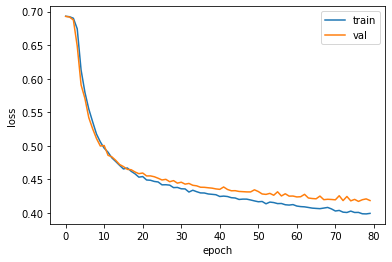

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## GRU 신경망 훈련하기

In [ ]:
model4 = keras.Sequential()

model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

model4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,validation_data=(val_seq, val_target),callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 4s 9ms/step - loss: 0.6924 - accuracy: 0.5354 - val_loss: 0.6916 - val_accuracy: 0.5552
Epoch 2/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6904 - accuracy: 0.5785 - val_loss: 0.6894 - val_accuracy: 0.5788
Epoch 3/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6870 - accuracy: 0.5985 - val_loss: 0.6851 - val_accuracy: 0.6034
Epoch 4/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6807 - accuracy: 0.6173 - val_loss: 0.6774 - val_accuracy: 0.6168
Epoch 5/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6694 - accuracy: 0.6385 - val_loss: 0.6631 - val_accuracy: 0.6370
Epoch 6/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6479 - accuracy: 0.6609 - val_loss: 0.6344 - val_accuracy: 0.6690
Epoch 7/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6002 - accuracy: 0.6953 - val_loss: 0.5665 - val_accuracy: 0.7166

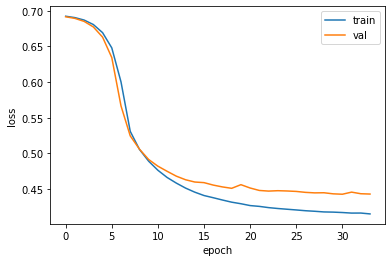

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 마무리

In [ ]:
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 5s 5ms/step - loss: 0.4130 - accuracy: 0.8079


[0.4129681885242462, 0.807919979095459]